In [1735]:
# !pip install xgboost
# !pip install lightgbm
# !pip install catboost

# Курсовой проект<a class="anchor" id="gaps"></a>

### Подключение библиотек и скриптов<a class="anchor" id="gaps"></a>

In [1736]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (roc_auc_score, roc_curve, auc, confusion_matrix, \
                             accuracy_score, classification_report, plot_confusion_matrix, \
                             plot_precision_recall_curve, precision_recall_curve, recall_score,
                             plot_roc_curve)

In [1737]:
pd.options.display.float_format ='{:,.2f}'.format

### Загрузка датасета<a class="anchor" id="gaps"></a>

In [1738]:
DATASET_PATH = 'C:/Users/kutsevichoi/JUPITER/DS Lib/course_project_train.csv'
TEST_DATASET_PATH = 'C:/Users/kutsevichoi/JUPITER/DS Lib/course_project_test.csv'

### Описание датасета<a class="anchor" id="gaps"></a>

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Score** - баллы кредитного рейтинга
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [1739]:
df = pd.read_csv(DATASET_PATH)
df.head(10)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,"482,087.00",NaN,0.00,11.00,26.30,"685,960.00",1.00,NaN,1.00,debt consolidation,Short Term,"99,999,999.00","47,386.00","7,914.00",749.00,0
1,Own Home,"1,025,487.00",10+ years,0.00,15.00,15.30,"1,181,730.00",0.00,NaN,0.00,debt consolidation,Long Term,"264,968.00","394,972.00","18,373.00",737.00,1
2,Home Mortgage,"751,412.00",8 years,0.00,11.00,35.00,"1,182,434.00",0.00,NaN,0.00,debt consolidation,Short Term,"99,999,999.00","308,389.00","13,651.00",742.00,0
3,Own Home,"805,068.00",6 years,0.00,8.00,22.50,"147,400.00",1.00,NaN,1.00,debt consolidation,Short Term,"121,396.00","95,855.00","11,338.00",694.00,0
4,Rent,"776,264.00",8 years,0.00,13.00,13.60,"385,836.00",1.00,NaN,0.00,debt consolidation,Short Term,"125,840.00","93,309.00","7,180.00",719.00,0
5,Rent,NaN,7 years,0.00,12.00,14.60,"366,784.00",0.00,NaN,0.00,other,Long Term,"337,304.00","165,680.00","18,692.00",NaN,1
6,Home Mortgage,"1,511,108.00",10+ years,0.00,9.00,20.30,"388,124.00",0.00,73.00,0.00,home improvements,Short Term,"99,999,999.00","51,623.00","2,317.00",745.00,0
7,Rent,"1,040,060.00",10+ years,0.00,13.00,12.00,"330,374.00",0.00,18.00,0.00,other,Short Term,"250,888.00","89,015.00","19,761.00",705.00,1
8,Home Mortgage,NaN,5 years,0.00,17.00,15.70,0.00,1.00,NaN,1.00,home improvements,Short Term,"129,734.00",19.00,17.00,NaN,0
9,Home Mortgage,NaN,1 year,0.00,10.00,24.60,"511,302.00",0.00,6.00,0.00,debt consolidation,Long Term,"572,880.00","205,333.00","17,613.00",NaN,1


In [1740]:
df.shape

(7500, 17)

In [1741]:
df['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

In [1742]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

### Обзор номинативных признаков<a class="anchor" id="gaps"></a>

* **Home Ownership** - домовладение
* **Years in current job** - количество лет на текущем месте работы
* **Purpose** - цель кредита
* **Term** - срок кредита

#### Проверка параметра 'Home Ownership'

In [1743]:
df['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

**Значения 'Home Mortgage' и 'Have Mortgage' не имеют смыслового различия - необходимо объединить их в один признак**

In [1744]:
df.loc[df['Home Ownership'] == 'Have Mortgage', 'Home Ownership'] = 'Home Mortgage'
df['Home Ownership'].value_counts()

Home Mortgage    3649
Rent             3204
Own Home          647
Name: Home Ownership, dtype: int64

In [1745]:
df['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

    Назначение кредита:
    реструктуризация долга 5944
    прочие 665
    улучшение жилищных условий 412
    бизнес-кредит 129
    покупка автомобиля 96
    лечение 71
    крупная покупка 40
    путешествия 37
    приобретение жилья 34
    малый бизнес 26
    свадьба 15
    переезд 11
    расходы на образование 10
    отпуск 8
    возобновляемые источники энергии 2**

##### Необходимо перегруппировать призаки по смыслу

In [1746]:
df.loc[df['Purpose'] == 'major purchase', 'Purpose'] = 'other'
df.loc[df['Purpose'] == 'buy house', 'Purpose'] = 'home improvements'
df.loc[df['Purpose'] == 'small business', 'Purpose'] = 'business loan'
df.loc[df['Purpose'] == 'wedding', 'Purpose'] = 'other'
df.loc[df['Purpose'] == 'educational expenses', 'Purpose'] = 'other'
df.loc[df['Purpose'] == 'moving', 'Purpose'] = 'other'
df.loc[df['Purpose'] == 'vacation', 'Purpose'] = 'take a trip'
df.loc[df['Purpose'] == 'renewable energy', 'Purpose'] = 'other'
df['Purpose'].value_counts()

debt consolidation    5944
other                  743
home improvements      446
business loan          155
buy a car               96
medical bills           71
take a trip             45
Name: Purpose, dtype: int64

#### Проверка параметра 'Term'

In [1747]:
df['Term'].value_counts()

Short Term    5556
Long Term     1944
Name: Term, dtype: int64

### Обработка пропусков значений

In [1748]:
df.isna().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [1749]:
df.groupby(df['Annual Income'].isnull()).mean()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
Annual Income,,,,,,,,,,,,,
False,"1,366,391.72",0.03,11.13,18.31,"802,647.99",0.17,34.72,0.12,"14,905,026.42","290,821.69","18,278.65","1,151.09",0.27
True,NaN,0.03,11.15,18.34,"1,489,091.80",0.17,34.58,0.11,"300,744.25","286,060.36","18,451.11",NaN,0.34


In [1750]:
df.groupby(df['Months since last delinquent'].isnull()).mean()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
Months since last delinquent,,,,,,,,,,,,,
False,"1,429,611.23",0.05,11.47,19.37,"723,300.18",0.20,34.69,0.12,"11,125,371.31","257,283.94","18,687.26","1,149.22",0.29
True,"1,312,457.02",0.02,10.85,17.44,"1,131,019.27",0.15,NaN,0.12,"12,499,678.10","317,102.54","18,002.12","1,152.68",0.28


In [1751]:
df.groupby(df['Bankruptcies'].isnull()).mean()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
Bankruptcies,,,,,,,,,,,,,
False,"1,367,863.16",0.03,11.13,18.32,"945,928.16",0.17,34.79,0.12,"11,855,008.82","290,023.59","18,336.55","1,148.65",0.28
True,"639,131.50",0.00,9.21,18.51,"531,053.29",0.00,12.07,NaN,"21,588,201.64","188,048.43","6,501.21","2,356.42",0.29


In [1752]:
df.groupby(df['Credit Score'].isnull()).mean()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
Credit Score,,,,,,,,,,,,,
False,"1,366,391.72",0.03,11.13,18.31,"802,647.99",0.17,34.72,0.12,"14,905,026.42","290,821.69","18,278.65","1,151.09",0.27
True,NaN,0.03,11.15,18.34,"1,489,091.80",0.17,34.58,0.11,"300,744.25","286,060.36","18,451.11",NaN,0.34


In [1753]:
df.isna().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

#### Проверка параметра 'Years in current job'

In [1754]:
df['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

In [1755]:
df = df.replace({'Years in current job' : { '10+ years' : '10', '< 1 year' : '0',
                                         '1 year' : '1', '2 years' : '2', '3 years' : '3', '4 years' : '4',
                                           '5 years' : '5', '6 years' : '6', '7 years' : '7', '8 years' : '8',
                                           '9 years' : '9','10 years' : '10',}})

In [1756]:
df['Years in current job'] = df['Years in current job'].astype(float)

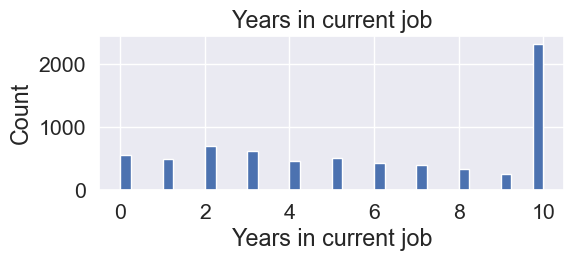

In [1757]:
plt.figure(figsize = (6, 2))

df['Years in current job'].hist(bins=40)
plt.ylabel('Count')
plt.xlabel('Years in current job')

plt.title('Years in current job')
plt.show()

In [1758]:
df['Years in current job'].value_counts()

10.00    2332
2.00      705
3.00      620
0.00      563
5.00      516
1.00      504
4.00      469
6.00      426
7.00      396
8.00      339
9.00      259
Name: Years in current job, dtype: int64

#### Явной корреляции между пропущенными значениями и целевой переменной выявить не удалось, следовательно заменяем пропущенные значения на наиболее часто встречающиеся<a class="anchor" id="gaps"></a>

In [1759]:
df['Annual Income'].fillna(df['Annual Income'].median(), inplace = True)
df['Years in current job'].fillna(df['Years in current job'].median(), inplace = True)
df['Months since last delinquent'].fillna(df['Months since last delinquent'].median(), inplace = True)
df['Bankruptcies'].fillna(df['Bankruptcies'].median(), inplace = True)
df['Credit Score'].fillna(df['Credit Score'].median(), inplace = True)

### Обзор количественных признаков<a class="anchor" id="gaps"></a>

#### Проверка параметра 'Tax Liens'

In [1760]:
df['Tax Liens'].value_counts()

0.00    7366
1.00      83
2.00      30
3.00      10
4.00       6
6.00       2
5.00       2
7.00       1
Name: Tax Liens, dtype: int64

#### Проверка параметра 'Months since last delinquent'

In [1761]:
df['Months since last delinquent'].value_counts()

32.00     4132
14.00       76
29.00       71
33.00       68
8.00        68
          ... 
86.00        1
118.00       1
84.00        1
91.00        1
92.00        1
Name: Months since last delinquent, Length: 89, dtype: int64

#### Проверка параметра 'Credit Score'

In [1762]:
df['Credit Score'].value_counts()

731.00      1651
740.00       169
747.00       168
748.00       157
745.00       152
            ... 
616.00         1
6,600.00       1
629.00         1
6,820.00       1
6,060.00       1
Name: Credit Score, Length: 268, dtype: int64

In [1763]:
for colname in ['Home Ownership', 'Purpose', 'Term']:
    df[colname] = df[colname].astype(str)

In [1764]:
for cat_colname in df.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n\n' + str(df[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Home Ownership

Home Mortgage    3649
Rent             3204
Own Home          647
Name: Home Ownership, dtype: int64
****************************************************************************************************

Purpose

debt consolidation    5944
other                  743
home improvements      446
business loan          155
buy a car               96
medical bills           71
take a trip             45
Name: Purpose, dtype: int64
****************************************************************************************************

Term

Short Term    5556
Long Term     1944
Name: Term, dtype: int64
****************************************************************************************************



In [1765]:
df.describe()

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,"7,500.00","7,500.00","7,500.00","7,500.00","7,500.00","7,500.00","7,500.00","7,500.00","7,500.00","7,500.00","7,500.00","7,500.00","7,500.00","7,500.00"
mean,"1,325,285.73",5.89,0.03,11.13,18.32,"945,153.73",0.17,33.23,0.12,"11,873,177.45","289,833.24","18,314.45","1,063.88",0.28
std,"756,755.14",3.53,0.27,4.91,7.04,"16,026,216.67",0.50,14.70,0.35,"31,926,122.97","317,871.38","11,926.76","1,438.34",0.45
min,"164,597.00",0.00,0.00,2.00,4.00,0.00,0.00,0.00,0.00,"11,242.00",0.00,0.00,585.00,0.00
25%,"931,133.00",3.00,0.00,8.00,13.50,"279,229.50",0.00,32.00,0.00,"180,169.00","114,256.50","10,067.50",718.00,0.00
50%,"1,168,386.00",6.00,0.00,10.00,17.00,"478,159.00",0.00,32.00,0.00,"309,573.00","209,323.00","16,076.50",731.00,0.00
75%,"1,499,974.00",10.00,0.00,14.00,21.80,"793,501.50",0.00,32.00,0.00,"519,882.00","360,406.25","23,818.00",740.00,1.00
max,"10,149,344.00",10.00,7.00,43.00,57.70,"1,304,726,170.00",7.00,118.00,4.00,"99,999,999.00","6,506,797.00","136,679.00","7,510.00",1.00


### Обработка выбросов<a class="anchor" id="outliers"></a>

array([[<AxesSubplot:title={'center':'Annual Income'}>,
        <AxesSubplot:title={'center':'Years in current job'}>,
        <AxesSubplot:title={'center':'Tax Liens'}>,
        <AxesSubplot:title={'center':'Number of Open Accounts'}>],
       [<AxesSubplot:title={'center':'Years of Credit History'}>,
        <AxesSubplot:title={'center':'Maximum Open Credit'}>,
        <AxesSubplot:title={'center':'Number of Credit Problems'}>,
        <AxesSubplot:title={'center':'Months since last delinquent'}>],
       [<AxesSubplot:title={'center':'Bankruptcies'}>,
        <AxesSubplot:title={'center':'Current Loan Amount'}>,
        <AxesSubplot:title={'center':'Current Credit Balance'}>,
        <AxesSubplot:title={'center':'Monthly Debt'}>],
       [<AxesSubplot:title={'center':'Credit Score'}>,
        <AxesSubplot:title={'center':'Credit Default'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

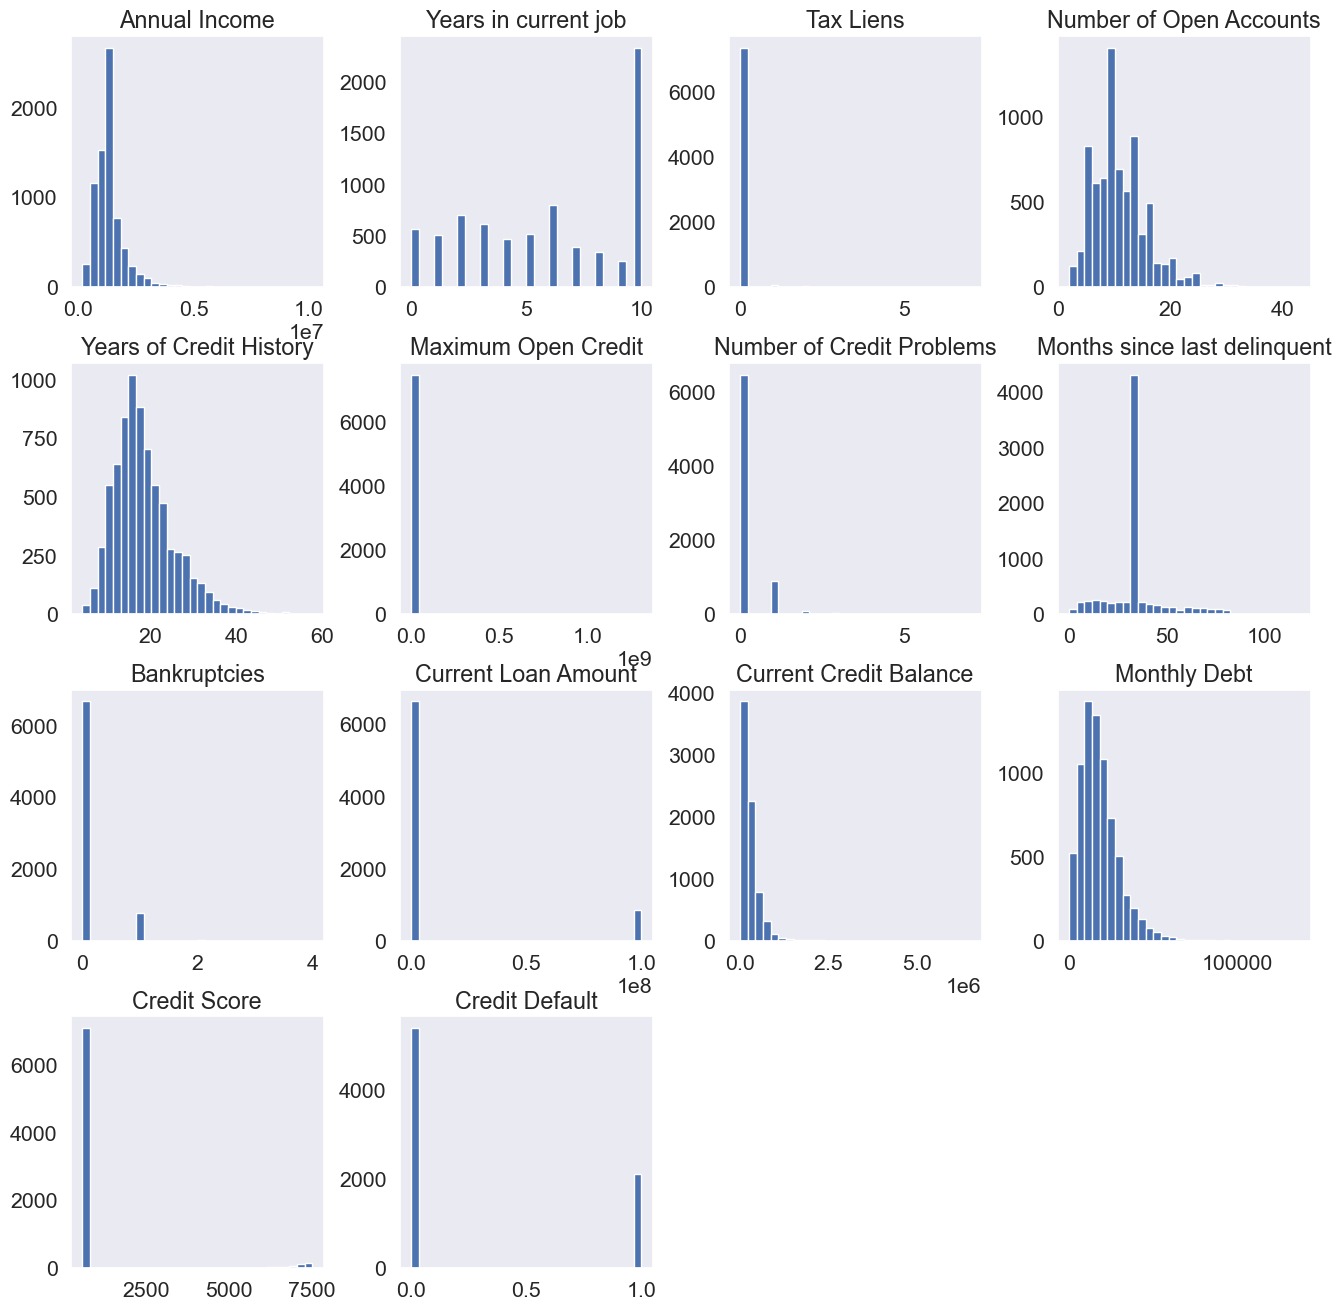

In [1766]:
df.hist(figsize=(16,16), bins=30, grid=False)

In [1767]:
df.sort_values(by='Annual Income', ascending=False)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
6472,Rent,"10,149,344.00",5.00,0.00,10.00,17.50,"270,380.00",0.00,22.00,0.00,debt consolidation,Short Term,"664,818.00","205,713.00","61,235.00",692.00,0
2200,Rent,"9,338,880.00",10.00,0.00,7.00,7.30,"1,092,608.00",0.00,32.00,0.00,business loan,Short Term,"788,480.00","326,496.00","40,546.00",720.00,0
1025,Rent,"8,923,844.00",3.00,0.00,15.00,17.20,"1,452,000.00",0.00,32.00,0.00,debt consolidation,Short Term,"670,428.00","1,084,710.00","62,095.00",723.00,0
1984,Home Mortgage,"8,758,449.00",10.00,0.00,10.00,20.60,0.00,0.00,32.00,0.00,home improvements,Short Term,"99,999,999.00","2,759,503.00","12,919.00",748.00,0
5396,Home Mortgage,"8,710,740.00",2.00,2.00,15.00,16.50,"3,162,896.00",2.00,32.00,0.00,debt consolidation,Short Term,"560,340.00","1,663,545.00","40,215.00",735.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,Rent,"192,223.00",2.00,0.00,4.00,12.30,"100,496.00",0.00,32.00,0.00,other,Short Term,"72,336.00","8,417.00","2,806.00",745.00,0
3310,Rent,"191,577.00",10.00,0.00,3.00,24.30,"270,754.00",0.00,32.00,0.00,medical bills,Short Term,"66,550.00","7,942.00",441.00,747.00,0
3946,Rent,"177,251.00",6.00,0.00,6.00,22.30,"116,710.00",0.00,27.00,0.00,debt consolidation,Short Term,"56,144.00","42,427.00","4,476.00",723.00,0
4485,Own Home,"175,845.00",6.00,0.00,6.00,17.60,"163,592.00",0.00,32.00,0.00,debt consolidation,Short Term,"60,830.00","74,746.00","3,546.00",658.00,0


In [1768]:
len(df[df['Maximum Open Credit'] < df['Current Loan Amount']])

2240

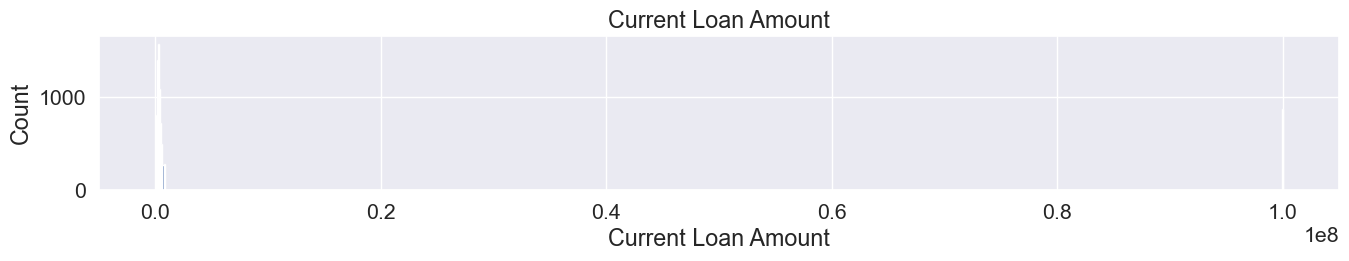

In [1769]:
plt.figure(figsize = (16, 2))

df['Current Loan Amount'].hist(bins=1000)
plt.ylabel('Count')
plt.xlabel('Current Loan Amount')

plt.title('Current Loan Amount')
plt.show()

In [1770]:
len(df[df['Current Loan Amount'] > 800000.0])

870

In [1771]:
df.loc[df['Current Loan Amount'] > 700000.0, 'Current Loan Amount'] = df['Current Loan Amount'].median()

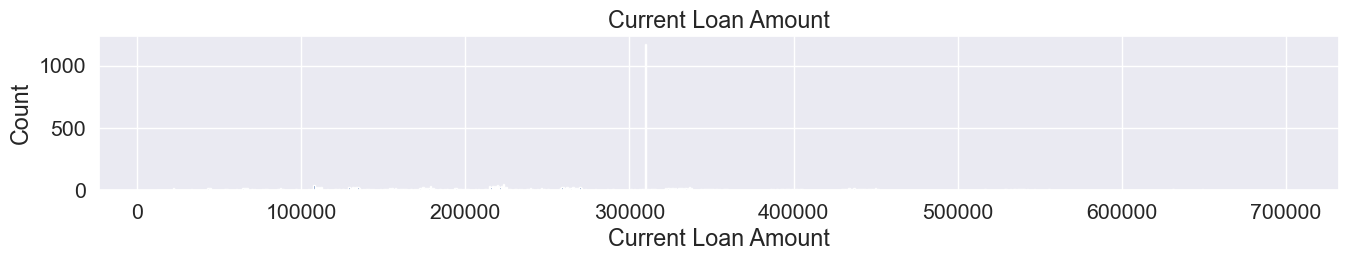

In [1772]:
plt.figure(figsize = (16, 2))

df['Current Loan Amount'].hist(bins=1000)
plt.ylabel('Count')
plt.xlabel('Current Loan Amount')

plt.title('Current Loan Amount')
plt.show()

##### Выбросы 'Maximum Open Credit'

In [1773]:
df.sort_values(by='Maximum Open Credit', ascending=False)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
617,Home Mortgage,"1,168,386.00",3.00,0.00,13.00,27.50,"1,304,726,170.00",0.00,32.00,0.00,debt consolidation,Short Term,"529,892.00","1,126,814.00","5,492.00",731.00,0
44,Home Mortgage,"1,334,256.00",10.00,0.00,17.00,15.40,"380,052,288.00",1.00,35.00,0.00,take a trip,Short Term,"33,110.00","656,450.00","34,357.00",729.00,0
2617,Home Mortgage,"3,217,802.00",10.00,0.00,12.00,35.50,"265,512,874.00",0.00,32.00,0.00,other,Short Term,"50,116.00","1,834,450.00","20,272.00",750.00,0
2023,Rent,"1,342,825.00",10.00,0.00,12.00,16.30,"57,562,560.00",0.00,32.00,0.00,other,Short Term,"166,826.00","944,547.00","9,176.00",749.00,0
2763,Home Mortgage,"3,377,440.00",10.00,0.00,11.00,23.20,"40,923,894.00",0.00,59.00,0.00,home improvements,Short Term,"309,573.00","1,908,550.00","5,770.00",743.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,Rent,"1,043,651.00",0.00,0.00,12.00,15.00,0.00,0.00,32.00,0.00,debt consolidation,Short Term,"175,780.00",0.00,"19,394.00",720.00,1
3219,Home Mortgage,"1,168,386.00",10.00,0.00,3.00,18.50,0.00,0.00,32.00,0.00,debt consolidation,Short Term,"79,200.00",0.00,0.00,731.00,0
4295,Home Mortgage,"1,168,386.00",9.00,0.00,9.00,14.50,0.00,0.00,2.00,0.00,business loan,Short Term,"260,810.00",0.00,"53,768.00",731.00,0
4274,Rent,"2,257,903.00",6.00,0.00,7.00,14.50,0.00,0.00,41.00,0.00,other,Short Term,"178,772.00",0.00,"52,496.00",722.00,0


#### Высокие значения показателей объясняются большими доходами клиентов

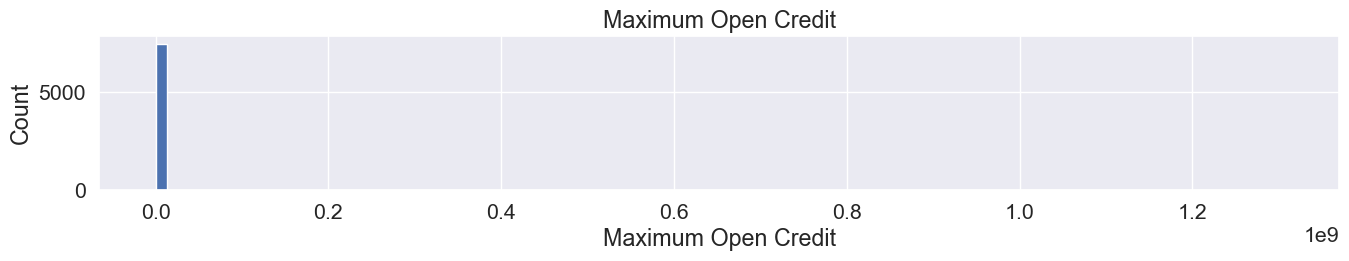

In [1774]:
plt.figure(figsize = (16, 2))

df['Maximum Open Credit'].hist(bins=100)
plt.ylabel('Count')
plt.xlabel('Maximum Open Credit')

plt.title('Maximum Open Credit')
plt.show()

#### Вызывают сомнения покозатели со значением 0

In [1775]:
len(df[df['Maximum Open Credit'] == 0])

65

In [1776]:
len(df[df['Maximum Open Credit'] == df['Current Loan Amount']])

2

In [1777]:
temp_df = (df[df['Maximum Open Credit'] == 0])
temp_df

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
8,Home Mortgage,"1,168,386.00",5.00,0.00,17.00,15.70,0.00,1.00,32.00,1.00,home improvements,Short Term,"129,734.00",19.00,17.00,731.00,0
91,Rent,"601,369.00",10.00,0.00,6.00,16.90,0.00,0.00,14.00,0.00,debt consolidation,Short Term,"165,924.00",0.00,"9,021.00",738.00,0
196,Rent,"815,157.00",7.00,0.00,3.00,8.80,0.00,0.00,32.00,0.00,business loan,Short Term,"218,042.00",0.00,"5,855.00",738.00,0
294,Home Mortgage,"2,033,931.00",7.00,0.00,6.00,21.10,0.00,0.00,32.00,0.00,home improvements,Short Term,"108,042.00",0.00,"30,340.00",742.00,0
309,Rent,"1,245,792.00",3.00,0.00,5.00,22.40,0.00,0.00,58.00,0.00,other,Long Term,"338,096.00",0.00,395.00,659.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,Home Mortgage,"1,168,386.00",8.00,0.00,10.00,13.00,0.00,0.00,32.00,0.00,debt consolidation,Long Term,"672,078.00",19.00,"8,860.00",731.00,0
6851,Home Mortgage,"2,251,728.00",10.00,0.00,8.00,15.40,0.00,0.00,32.00,0.00,home improvements,Long Term,"309,573.00",0.00,"36,778.00",725.00,0
7014,Home Mortgage,"1,223,771.00",5.00,0.00,9.00,24.00,0.00,0.00,32.00,0.00,business loan,Long Term,"309,573.00",0.00,"15,348.00",737.00,1
7124,Rent,"1,168,386.00",1.00,0.00,4.00,11.00,0.00,0.00,50.00,0.00,debt consolidation,Short Term,"134,024.00",0.00,0.00,731.00,0


#### Приравняем показатель максимального кредита с текущим

In [1778]:
df.loc[df['Maximum Open Credit'] == 0, 'Maximum Open Credit'] = df['Current Loan Amount']

In [1779]:
df.sort_values(by='Maximum Open Credit', ascending=False)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
617,Home Mortgage,"1,168,386.00",3.00,0.00,13.00,27.50,"1,304,726,170.00",0.00,32.00,0.00,debt consolidation,Short Term,"529,892.00","1,126,814.00","5,492.00",731.00,0
44,Home Mortgage,"1,334,256.00",10.00,0.00,17.00,15.40,"380,052,288.00",1.00,35.00,0.00,take a trip,Short Term,"33,110.00","656,450.00","34,357.00",729.00,0
2617,Home Mortgage,"3,217,802.00",10.00,0.00,12.00,35.50,"265,512,874.00",0.00,32.00,0.00,other,Short Term,"50,116.00","1,834,450.00","20,272.00",750.00,0
2023,Rent,"1,342,825.00",10.00,0.00,12.00,16.30,"57,562,560.00",0.00,32.00,0.00,other,Short Term,"166,826.00","944,547.00","9,176.00",749.00,0
2763,Home Mortgage,"3,377,440.00",10.00,0.00,11.00,23.20,"40,923,894.00",0.00,59.00,0.00,home improvements,Short Term,"309,573.00","1,908,550.00","5,770.00",743.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,Rent,"1,168,386.00",0.00,0.00,3.00,10.20,"10,956.00",0.00,32.00,0.00,buy a car,Short Term,"95,876.00","5,890.00","3,616.00",731.00,1
3041,Rent,"316,198.00",0.00,0.00,2.00,11.50,"10,890.00",0.00,32.00,0.00,business loan,Short Term,"42,504.00","2,375.00","6,400.00",739.00,0
1513,Rent,"2,106,302.00",2.00,0.00,9.00,21.50,"6,622.00",0.00,70.00,0.00,other,Short Term,"66,506.00",494.00,"27,382.00",688.00,0
4365,Rent,"729,315.00",3.00,0.00,4.00,13.80,"6,556.00",1.00,32.00,0.00,other,Short Term,"174,570.00","5,624.00","5,992.00",650.00,1


In [1780]:
len(df[df['Maximum Open Credit'] == 0])

0

In [1781]:
len(df[df['Maximum Open Credit'] == df['Current Loan Amount']])

67

#### Проверка параметра Credit Score

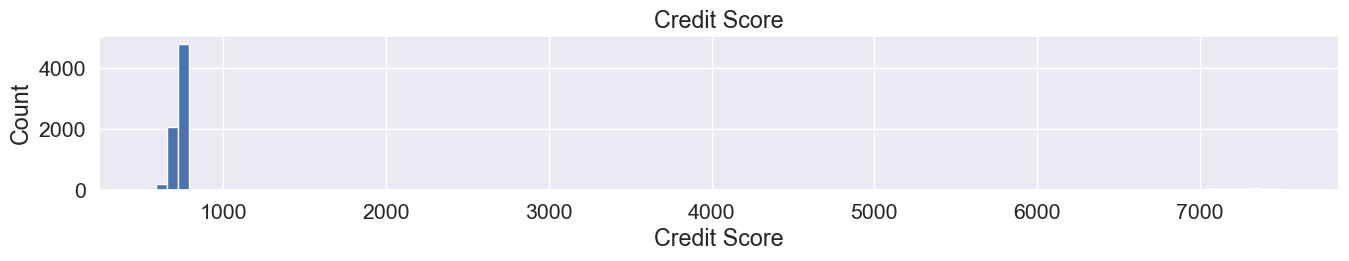

In [1782]:
plt.figure(figsize = (16, 2))

df['Credit Score'].hist(bins=100)
plt.ylabel('Count')
plt.xlabel('Credit Score')

plt.title('Credit Score')
plt.show()

In [1783]:
temp_df = df[df['Credit Score'] > 800]
temp_df.shape

(400, 17)

In [1784]:
len(temp_df[temp_df['Credit Score'] < 6000])

0

In [1785]:
temp_df.sort_values(by='Credit Score')

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
7433,Rent,"2,011,758.00",0.00,0.00,4.00,14.90,"22,176.00",0.00,43.00,0.00,buy a car,Long Term,"106,480.00","18,791.00","12,590.00","6,060.00",1
718,Rent,"1,345,162.00",6.00,0.00,13.00,10.50,"730,048.00",0.00,14.00,0.00,other,Long Term,"529,562.00","308,940.00","6,479.00","6,110.00",1
5326,Rent,"310,555.00",6.00,0.00,11.00,14.70,"342,782.00",0.00,32.00,0.00,debt consolidation,Short Term,"106,656.00","240,692.00","10,093.00","6,150.00",1
2682,Rent,"1,700,918.00",2.00,0.00,17.00,13.40,"781,594.00",0.00,56.00,0.00,debt consolidation,Long Term,"697,708.00","369,227.00","12,544.00","6,160.00",1
6631,Rent,"1,871,937.00",5.00,0.00,9.00,18.50,"677,182.00",0.00,32.00,0.00,debt consolidation,Long Term,"309,573.00","552,672.00","26,519.00","6,170.00",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,Rent,"464,474.00",10.00,0.00,5.00,14.90,"38,126.00",0.00,0.00,0.00,other,Short Term,"44,814.00","18,373.00",929.00,"7,490.00",1
2408,Home Mortgage,"973,085.00",8.00,0.00,16.00,16.00,"1,937,320.00",0.00,32.00,0.00,debt consolidation,Short Term,"332,156.00","493,582.00","17,029.00","7,500.00",1
355,Rent,"960,184.00",10.00,0.00,9.00,43.30,"301,026.00",0.00,42.00,0.00,debt consolidation,Short Term,"87,912.00","86,051.00","3,433.00","7,500.00",1
2213,Own Home,"542,735.00",10.00,0.00,9.00,16.00,"357,874.00",0.00,32.00,0.00,other,Short Term,"321,266.00","101,384.00","7,824.00","7,510.00",1


#### Выбросы в кредитном рейтинге вероятнее всего из-за ошибочного ввода 0 в конце

In [1786]:
df.loc[df['Credit Score'] > 800, 'Credit Score'] = df['Credit Score']/10

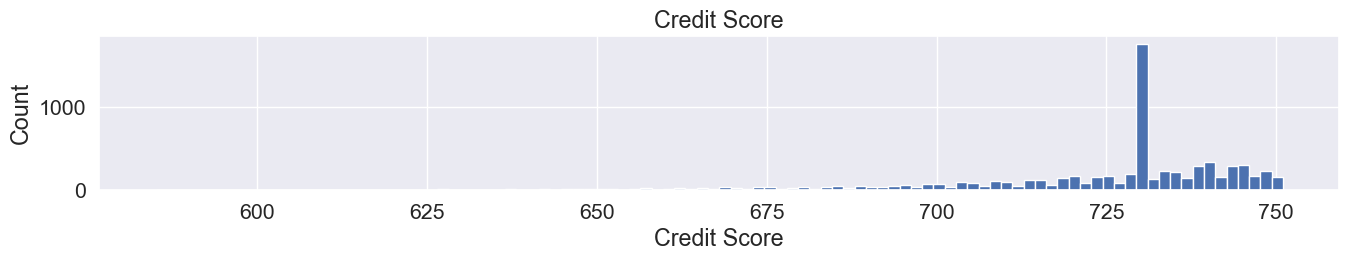

In [1787]:
plt.figure(figsize = (16, 2))

df['Credit Score'].hist(bins=100)
plt.ylabel('Count')
plt.xlabel('Credit Score')

plt.title('Credit Score')
plt.show()

In [1788]:
df[df['Credit Score'] < 650]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
17,Home Mortgage,"3,361,898.00",3.00,0.00,14.00,28.50,"1,042,096.00",0.00,32.00,0.00,debt consolidation,Long Term,"498,872.00","689,396.00","52,249.00",644.00,1
69,Home Mortgage,"1,408,527.00",2.00,0.00,12.00,17.50,"700,062.00",0.00,21.00,0.00,other,Long Term,"525,998.00","174,135.00","9,320.00",647.00,1
101,Rent,"960,260.00",10.00,0.00,10.00,16.30,"796,312.00",0.00,34.00,0.00,other,Long Term,"333,564.00","320,473.00","16,645.00",617.00,0
114,Rent,"1,030,579.00",0.00,0.00,11.00,8.00,"141,020.00",0.00,32.00,0.00,home improvements,Long Term,"379,698.00","95,247.00","10,478.00",624.00,1
186,Rent,"1,325,345.00",0.00,0.00,16.00,9.90,"980,342.00",0.00,32.00,0.00,debt consolidation,Long Term,"438,460.00","536,788.00","24,850.00",645.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7410,Home Mortgage,"4,655,475.00",5.00,0.00,17.00,18.90,"1,193,324.00",0.00,32.00,0.00,business loan,Long Term,"309,573.00","598,766.00","26,420.00",622.00,1
7431,Rent,"1,065,463.00",1.00,0.00,7.00,10.90,"223,036.00",0.00,32.00,0.00,debt consolidation,Long Term,"309,573.00","179,512.00","17,669.00",649.00,0
7433,Rent,"2,011,758.00",0.00,0.00,4.00,14.90,"22,176.00",0.00,43.00,0.00,buy a car,Long Term,"106,480.00","18,791.00","12,590.00",606.00,1
7436,Own Home,"1,070,080.00",6.00,0.00,17.00,19.00,"405,702.00",0.00,57.00,0.00,debt consolidation,Long Term,"337,348.00","234,061.00","24,701.00",645.00,1


In [1789]:
df[df['Credit Score'] < 750]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,"482,087.00",6.00,0.00,11.00,26.30,"685,960.00",1.00,32.00,1.00,debt consolidation,Short Term,"309,573.00","47,386.00","7,914.00",749.00,0
1,Own Home,"1,025,487.00",10.00,0.00,15.00,15.30,"1,181,730.00",0.00,32.00,0.00,debt consolidation,Long Term,"264,968.00","394,972.00","18,373.00",737.00,1
2,Home Mortgage,"751,412.00",8.00,0.00,11.00,35.00,"1,182,434.00",0.00,32.00,0.00,debt consolidation,Short Term,"309,573.00","308,389.00","13,651.00",742.00,0
3,Own Home,"805,068.00",6.00,0.00,8.00,22.50,"147,400.00",1.00,32.00,1.00,debt consolidation,Short Term,"121,396.00","95,855.00","11,338.00",694.00,0
4,Rent,"776,264.00",8.00,0.00,13.00,13.60,"385,836.00",1.00,32.00,0.00,debt consolidation,Short Term,"125,840.00","93,309.00","7,180.00",719.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Rent,"402,192.00",0.00,0.00,3.00,8.50,"107,866.00",0.00,32.00,0.00,other,Short Term,"129,360.00","73,492.00","1,900.00",697.00,0
7496,Home Mortgage,"1,533,984.00",1.00,0.00,10.00,26.50,"686,312.00",0.00,43.00,0.00,debt consolidation,Long Term,"444,048.00","456,399.00","12,783.00",741.00,1
7497,Rent,"1,878,910.00",6.00,0.00,12.00,32.10,"1,778,920.00",0.00,32.00,0.00,buy a car,Short Term,"309,573.00","477,812.00","12,479.00",748.00,0
7498,Home Mortgage,"1,168,386.00",6.00,0.00,21.00,26.50,"1,141,250.00",0.00,32.00,0.00,debt consolidation,Short Term,"615,274.00","476,064.00","37,118.00",731.00,0


#### Клиенты с низким кредитным рейтингом (меньше 650) действительно чаще имеют сбывшийся отрицательный прогноз по срыву платежа

#### Проверка параметра 'Number of Credit Problems'

In [1790]:
df['Number of Credit Problems'].value_counts()

0.00    6469
1.00     882
2.00      93
3.00      35
4.00       9
5.00       7
6.00       4
7.00       1
Name: Number of Credit Problems, dtype: int64

In [1791]:
temp_df['Bankruptcies'].value_counts()

0.00    370
1.00     27
2.00      3
Name: Bankruptcies, dtype: int64

#### Проверка 'Current Credit Balance'

<AxesSubplot:xlabel='Current Credit Balance'>

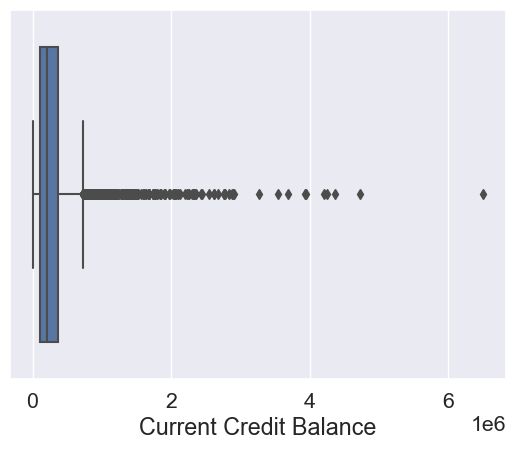

In [1792]:
sns.boxplot(df['Current Credit Balance'])

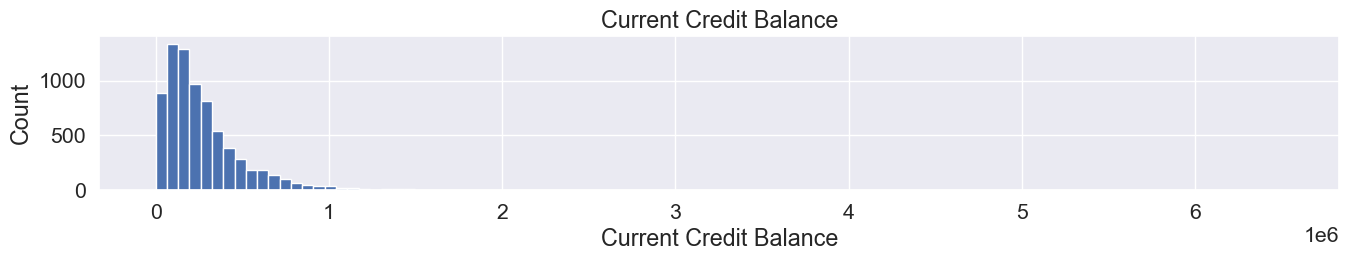

In [1793]:
plt.figure(figsize = (16, 2))

df['Current Credit Balance'].hist(bins=100)
plt.ylabel('Count')
plt.xlabel('Current Credit Balance')

plt.title('Current Credit Balance')
plt.show()

In [1794]:
df.sort_values(by= 'Current Credit Balance', ascending=False)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
4769,Home Mortgage,"3,739,960.00",9.00,0.00,7.00,22.80,"26,343,328.00",0.00,32.00,0.00,home improvements,Short Term,"309,573.00","6,506,797.00","38,023.00",703.00,0
4745,Own Home,"6,029,954.00",4.00,0.00,30.00,17.50,"11,603,856.00",0.00,32.00,0.00,debt consolidation,Short Term,"309,573.00","4,720,132.00","136,679.00",745.00,0
4602,Home Mortgage,"3,990,038.00",10.00,0.00,10.00,23.00,"9,541,136.00",0.00,5.00,0.00,home improvements,Long Term,"309,573.00","4,367,245.00","29,792.00",687.00,0
1580,Home Mortgage,"3,783,660.00",1.00,0.00,9.00,17.00,"7,204,516.00",0.00,32.00,0.00,debt consolidation,Short Term,"309,573.00","4,249,673.00","42,251.00",739.00,0
7278,Own Home,"2,418,415.00",6.00,0.00,13.00,14.00,"7,453,138.00",0.00,45.00,0.00,debt consolidation,Long Term,"440,088.00","4,209,659.00","29,626.00",714.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3412,Home Mortgage,"1,543,560.00",6.00,0.00,2.00,16.50,"435,380.00",0.00,52.00,0.00,home improvements,Long Term,"435,380.00",0.00,373.00,657.00,0
7124,Rent,"1,168,386.00",1.00,0.00,4.00,11.00,"134,024.00",0.00,50.00,0.00,debt consolidation,Short Term,"134,024.00",0.00,0.00,731.00,0
3401,Rent,"326,154.00",6.00,0.00,2.00,19.10,"309,573.00",0.00,77.00,0.00,other,Short Term,"309,573.00",0.00,"1,245.00",712.00,0
3314,Rent,"1,168,386.00",1.00,0.00,15.00,14.20,"301,048.00",0.00,71.00,0.00,business loan,Long Term,"301,048.00",0.00,"12,051.00",731.00,1


In [1795]:
temp_df = df[df['Current Credit Balance'] > 1000000]
temp_df.shape

(188, 17)

<AxesSubplot:xlabel='Current Credit Balance'>

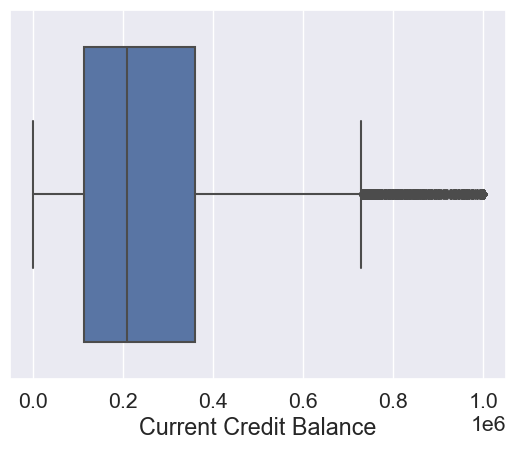

In [1796]:
df.loc[df['Current Credit Balance'] > 1000000, 'Current Credit Balance'] = 1000000
sns.boxplot(df['Current Credit Balance'])

#### Проверка параметра 'Bankruptcies'

In [1797]:
df['Bankruptcies'].value_counts()

0.00    6674
1.00     786
2.00      31
3.00       7
4.00       2
Name: Bankruptcies, dtype: int64

In [1798]:
temp_df = df[df['Bankruptcies'] != 0]
temp_df.shape

(826, 17)

In [1799]:
temp_df['Number of Credit Problems'].value_counts()

1.00    738
2.00     57
3.00     22
4.00      5
6.00      2
5.00      2
Name: Number of Credit Problems, dtype: int64

### Построение новых признаков<a class="anchor" id="new_features"></a>

#### 'Months since last delinquent'

In [1800]:
temp_df = df[df['Number of Credit Problems'] == 0]
temp_df['Months since last delinquent'].value_counts()

32.00     3600
14.00       68
13.00       62
19.00       62
33.00       61
          ... 
83.00        3
86.00        1
118.00       1
84.00        1
92.00        1
Name: Months since last delinquent, Length: 88, dtype: int64

In [1801]:
temp_df.sort_values(by='Months since last delinquent')

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
7184,Rent,"240,122.00",0.00,0.00,3.00,12.90,"11,132.00",0.00,0.00,0.00,debt consolidation,Short Term,"46,706.00","8,797.00","2,881.00",706.00,1
5705,Home Mortgage,"2,716,031.00",10.00,0.00,12.00,15.00,"867,350.00",0.00,0.00,0.00,debt consolidation,Short Term,"436,788.00","448,685.00","29,424.00",728.00,0
257,Home Mortgage,"1,168,386.00",2.00,0.00,15.00,13.60,"1,556,390.00",0.00,0.00,0.00,debt consolidation,Short Term,"447,480.00","524,210.00","19,613.00",731.00,0
898,Rent,"739,005.00",2.00,0.00,20.00,18.30,"2,177,758.00",0.00,0.00,0.00,debt consolidation,Short Term,"456,808.00","607,487.00","9,669.00",732.00,1
4938,Home Mortgage,"862,106.00",7.00,0.00,3.00,14.00,"474,694.00",0.00,0.00,0.00,debt consolidation,Short Term,"26,048.00","55,347.00","3,096.00",743.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5546,Home Mortgage,"1,073,994.00",2.00,0.00,15.00,16.50,"515,328.00",0.00,83.00,0.00,debt consolidation,Long Term,"177,650.00","108,148.00","9,219.00",741.00,1
4682,Home Mortgage,"737,371.00",4.00,0.00,15.00,16.50,"268,906.00",0.00,84.00,0.00,debt consolidation,Long Term,"359,590.00","72,219.00","17,390.00",721.00,1
428,Rent,"1,146,954.00",10.00,0.00,12.00,11.40,"518,056.00",0.00,86.00,0.00,other,Long Term,"221,342.00","321,689.00","19,976.00",689.00,1
5214,Home Mortgage,"1,393,175.00",6.00,0.00,12.00,26.20,"611,138.00",0.00,92.00,0.00,debt consolidation,Short Term,"56,012.00","131,423.00","10,542.00",748.00,0


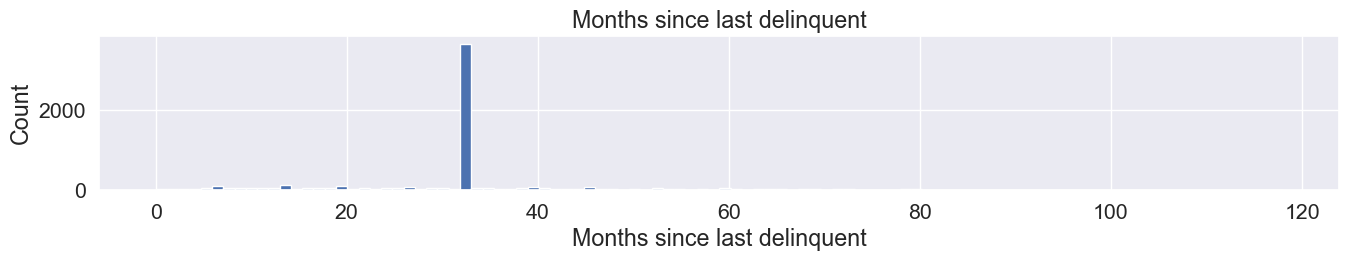

In [1802]:
plt.figure(figsize = (16, 2))

temp_df['Months since last delinquent'].hist(bins=100)
plt.ylabel('Count')
plt.xlabel('Months since last delinquent')

plt.title('Months since last delinquent')
plt.show()

#### Данные в колонках 'Number of Credit Problems' и 'Months since last delinquent' выглядят странно, т.к. люди не имевшие проблем с кредитами имеют запись с формулировкой "количество месяцев с последней просрочки платежа". Данные о банкротствах тоже отсутствуют. Вероятнее всего из-за отсутствия возможности внести корректные данные, вводились произвольные числа. Для решения проблемы необходимо сделать признак в категориальным

In [1803]:
df['Months since last delinquent'].value_counts()

32.00     4132
14.00       76
29.00       71
33.00       68
8.00        68
          ... 
86.00        1
118.00       1
84.00        1
91.00        1
92.00        1
Name: Months since last delinquent, Length: 89, dtype: int64

In [1804]:
df.sort_values(by= 'Months since last delinquent', ascending=False)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
4191,Home Mortgage,"3,009,201.00",6.00,0.00,10.00,20.80,"773,322.00",0.00,118.00,0.00,debt consolidation,Short Term,"449,592.00","299,877.00","15,297.00",738.00,0
5214,Home Mortgage,"1,393,175.00",6.00,0.00,12.00,26.20,"611,138.00",0.00,92.00,0.00,debt consolidation,Short Term,"56,012.00","131,423.00","10,542.00",748.00,0
5202,Rent,"1,075,115.00",2.00,0.00,18.00,12.30,"306,900.00",1.00,91.00,1.00,debt consolidation,Short Term,"195,316.00","163,001.00","11,289.00",681.00,0
428,Rent,"1,146,954.00",10.00,0.00,12.00,11.40,"518,056.00",0.00,86.00,0.00,other,Long Term,"221,342.00","321,689.00","19,976.00",689.00,1
4682,Home Mortgage,"737,371.00",4.00,0.00,15.00,16.50,"268,906.00",0.00,84.00,0.00,debt consolidation,Long Term,"359,590.00","72,219.00","17,390.00",721.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3252,Rent,"832,770.00",0.00,0.00,7.00,16.50,"636,856.00",0.00,0.00,0.00,business loan,Short Term,"156,970.00","52,250.00","1,145.00",750.00,0
2890,Home Mortgage,"1,230,193.00",7.00,0.00,13.00,19.00,"422,884.00",0.00,0.00,0.00,debt consolidation,Short Term,"394,460.00","301,663.00","20,913.00",734.00,0
1404,Rent,"349,391.00",0.00,0.00,4.00,12.70,"11,242.00",0.00,0.00,0.00,other,Short Term,"11,242.00",0.00,"1,243.00",747.00,0
7184,Rent,"240,122.00",0.00,0.00,3.00,12.90,"11,132.00",0.00,0.00,0.00,debt consolidation,Short Term,"46,706.00","8,797.00","2,881.00",706.00,1


In [1805]:
df.loc[df['Number of Credit Problems'] == 0, 'Months since last delinquent'] = 0

In [1806]:
df['Months since last delinquent'].describe

<bound method NDFrame.describe of 0      32.00
1       0.00
2       0.00
3      32.00
4      32.00
        ... 
7495    0.00
7496    0.00
7497    0.00
7498    0.00
7499    0.00
Name: Months since last delinquent, Length: 7500, dtype: float64>

#### !!! Удаление признака 'Months since last delinquent' !!!

In [1807]:
df = df.drop(columns=['Months since last delinquent'])
df

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,"482,087.00",6.00,0.00,11.00,26.30,"685,960.00",1.00,1.00,debt consolidation,Short Term,"309,573.00","47,386.00","7,914.00",749.00,0
1,Own Home,"1,025,487.00",10.00,0.00,15.00,15.30,"1,181,730.00",0.00,0.00,debt consolidation,Long Term,"264,968.00","394,972.00","18,373.00",737.00,1
2,Home Mortgage,"751,412.00",8.00,0.00,11.00,35.00,"1,182,434.00",0.00,0.00,debt consolidation,Short Term,"309,573.00","308,389.00","13,651.00",742.00,0
3,Own Home,"805,068.00",6.00,0.00,8.00,22.50,"147,400.00",1.00,1.00,debt consolidation,Short Term,"121,396.00","95,855.00","11,338.00",694.00,0
4,Rent,"776,264.00",8.00,0.00,13.00,13.60,"385,836.00",1.00,0.00,debt consolidation,Short Term,"125,840.00","93,309.00","7,180.00",719.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Rent,"402,192.00",0.00,0.00,3.00,8.50,"107,866.00",0.00,0.00,other,Short Term,"129,360.00","73,492.00","1,900.00",697.00,0
7496,Home Mortgage,"1,533,984.00",1.00,0.00,10.00,26.50,"686,312.00",0.00,0.00,debt consolidation,Long Term,"444,048.00","456,399.00","12,783.00",741.00,1
7497,Rent,"1,878,910.00",6.00,0.00,12.00,32.10,"1,778,920.00",0.00,0.00,buy a car,Short Term,"309,573.00","477,812.00","12,479.00",748.00,0
7498,Home Mortgage,"1,168,386.00",6.00,0.00,21.00,26.50,"1,141,250.00",0.00,0.00,debt consolidation,Short Term,"615,274.00","476,064.00","37,118.00",731.00,0


#### 'Home Ownership'

In [1808]:
df['Home Ownership'].value_counts()

Home Mortgage    3649
Rent             3204
Own Home          647
Name: Home Ownership, dtype: int64

In [1809]:
df['Home Ownership'] = df['Home Ownership'].map({'Own Home':'0', 'Home Mortgage':'1', 'Rent':'2'}).astype(int)
df['Home Ownership'].value_counts()

1    3649
2    3204
0     647
Name: Home Ownership, dtype: int64

#### 'Tax Liens'

In [1810]:
df['Tax Liens'].value_counts()

0.00    7366
1.00      83
2.00      30
3.00      10
4.00       6
6.00       2
5.00       2
7.00       1
Name: Tax Liens, dtype: int64

In [1811]:
temp_df = df[df['Tax Liens'] == 1]
temp_df['Credit Default'].value_counts()

0    59
1    24
Name: Credit Default, dtype: int64

In [1812]:
temp_df = df[df['Tax Liens'] == 2]
temp_df['Credit Default'].value_counts()

0    15
1    15
Name: Credit Default, dtype: int64

In [1813]:
temp_df = df[df['Tax Liens'] >= 2]
temp_df['Credit Default'].value_counts()

0    27
1    24
Name: Credit Default, dtype: int64

In [1814]:
temp_df = df[df['Tax Liens'] == 3]
temp_df['Credit Default'].value_counts()

1    5
0    5
Name: Credit Default, dtype: int64

In [1815]:
temp_df = df[df['Tax Liens'] == 4]
temp_df['Credit Default'].value_counts()

0    3
1    3
Name: Credit Default, dtype: int64

In [1816]:
temp_df = df[df['Tax Liens'] >= 5]
temp_df['Credit Default'].value_counts()

0    4
1    1
Name: Credit Default, dtype: int64

#### Если показатель 'Tax Liens' > 2, то количество процент переменных 'Credit Default' со значением '1' возрастает

#### 'Purpose'

In [1817]:
df['Purpose'].value_counts()

debt consolidation    5944
other                  743
home improvements      446
business loan          155
buy a car               96
medical bills           71
take a trip             45
Name: Purpose, dtype: int64

In [1818]:
temp_df = df[df['Purpose'] == 'debt consolidation']
temp_df['Credit Default'].value_counts()

0    4290
1    1654
Name: Credit Default, dtype: int64

In [1819]:
temp_df = df[df['Purpose'] == 'other']
temp_df['Credit Default'].value_counts()

0    528
1    215
Name: Credit Default, dtype: int64

In [1820]:
temp_df = df[df['Purpose'] == 'home improvements']
temp_df['Credit Default'].value_counts()

0    329
1    117
Name: Credit Default, dtype: int64

In [1821]:
temp_df = df[df['Purpose'] == 'buy a car']
temp_df['Credit Default'].value_counts()

0    72
1    24
Name: Credit Default, dtype: int64

In [1822]:
temp_df = df[df['Purpose'] == 'medical bills']
temp_df['Credit Default'].value_counts()

0    49
1    22
Name: Credit Default, dtype: int64

In [1823]:
temp_df = df[df['Purpose'] == 'take a trip']
temp_df['Credit Default'].value_counts()

0    33
1    12
Name: Credit Default, dtype: int64

In [1824]:
df['Purpose'].value_counts()

debt consolidation    5944
other                  743
home improvements      446
business loan          155
buy a car               96
medical bills           71
take a trip             45
Name: Purpose, dtype: int64

In [1825]:
df['Purpose'] = df['Purpose'].map({'debt consolidation':'0', 'other':'1', 'home improvements':'2', 'business loan':'3', 'buy a car':'4', 'medical bills':'5', 'take a trip':'6'}).astype(int)
df['Purpose'].value_counts()

0    5944
1     743
2     446
3     155
4      96
5      71
6      45
Name: Purpose, dtype: int64

#### 'Term'

In [1826]:
df['Term'].value_counts()

Short Term    5556
Long Term     1944
Name: Term, dtype: int64

In [1827]:
df['Term'] = df['Term'].map({'Short Term':'0', 'Long Term':'1'}).astype(int)
df['Term'].value_counts()

0    5556
1    1944
Name: Term, dtype: int64

In [1828]:
for cat_colname in df.select_dtypes(include='object').columns[1:]:
    df = pd.concat([df, pd.get_dummies(df[cat_colname], prefix=cat_colname)], axis=1)

In [1829]:
df.isna().sum()

Home Ownership               0
Annual Income                0
Years in current job         0
Tax Liens                    0
Number of Open Accounts      0
Years of Credit History      0
Maximum Open Credit          0
Number of Credit Problems    0
Bankruptcies                 0
Purpose                      0
Term                         0
Current Loan Amount          0
Current Credit Balance       0
Monthly Debt                 0
Credit Score                 0
Credit Default               0
dtype: int64

In [1830]:
df

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,"482,087.00",6.00,0.00,11.00,26.30,"685,960.00",1.00,1.00,0,0,"309,573.00","47,386.00","7,914.00",749.00,0
1,0,"1,025,487.00",10.00,0.00,15.00,15.30,"1,181,730.00",0.00,0.00,0,1,"264,968.00","394,972.00","18,373.00",737.00,1
2,1,"751,412.00",8.00,0.00,11.00,35.00,"1,182,434.00",0.00,0.00,0,0,"309,573.00","308,389.00","13,651.00",742.00,0
3,0,"805,068.00",6.00,0.00,8.00,22.50,"147,400.00",1.00,1.00,0,0,"121,396.00","95,855.00","11,338.00",694.00,0
4,2,"776,264.00",8.00,0.00,13.00,13.60,"385,836.00",1.00,0.00,0,0,"125,840.00","93,309.00","7,180.00",719.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,2,"402,192.00",0.00,0.00,3.00,8.50,"107,866.00",0.00,0.00,1,0,"129,360.00","73,492.00","1,900.00",697.00,0
7496,1,"1,533,984.00",1.00,0.00,10.00,26.50,"686,312.00",0.00,0.00,0,1,"444,048.00","456,399.00","12,783.00",741.00,1
7497,2,"1,878,910.00",6.00,0.00,12.00,32.10,"1,778,920.00",0.00,0.00,4,0,"309,573.00","477,812.00","12,479.00",748.00,0
7498,1,"1,168,386.00",6.00,0.00,21.00,26.50,"1,141,250.00",0.00,0.00,0,0,"615,274.00","476,064.00","37,118.00",731.00,0


### Сохранение обучающего датасета<a class="anchor" id="saving"></a>

In [1831]:
df.to_csv('C:/Users/kutsevichoi/JUPITER/DS Lib/train.csv', index=False, encoding='utf-8')

### Обучение модели

In [1832]:
df.columns

Index(['Home Ownership', 'Annual Income', 'Years in current job', 'Tax Liens',
       'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems', 'Bankruptcies',
       'Purpose', 'Term', 'Current Loan Amount', 'Current Credit Balance',
       'Monthly Debt', 'Credit Score', 'Credit Default'],
      dtype='object')

In [1833]:
X = df.drop(columns='Credit Default')
y = df['Credit Default']

In [1834]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=2)
X_train.shape, X_test.shape

((6000, 15), (1500, 15))

In [1835]:
%%time
tree = DecisionTreeClassifier(random_state=1)

param_grid=[{
             'max_depth': range(1, 7), 
             'min_samples_leaf': range(1, 7), 
            }]

grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)
tree = grid_search.best_estimator_

Wall time: 2.53 s


In [1836]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 6}

In [1837]:
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

pred_proba_test = tree.predict_proba(X_test)
pred_proba_test[:5]

array([[0.86102719, 0.13897281],
       [0.75153752, 0.24846248],
       [0.50432277, 0.49567723],
       [0.75153752, 0.24846248],
       [0.75153752, 0.24846248]])

### Подсчет метрик

**Матрица корреляций**

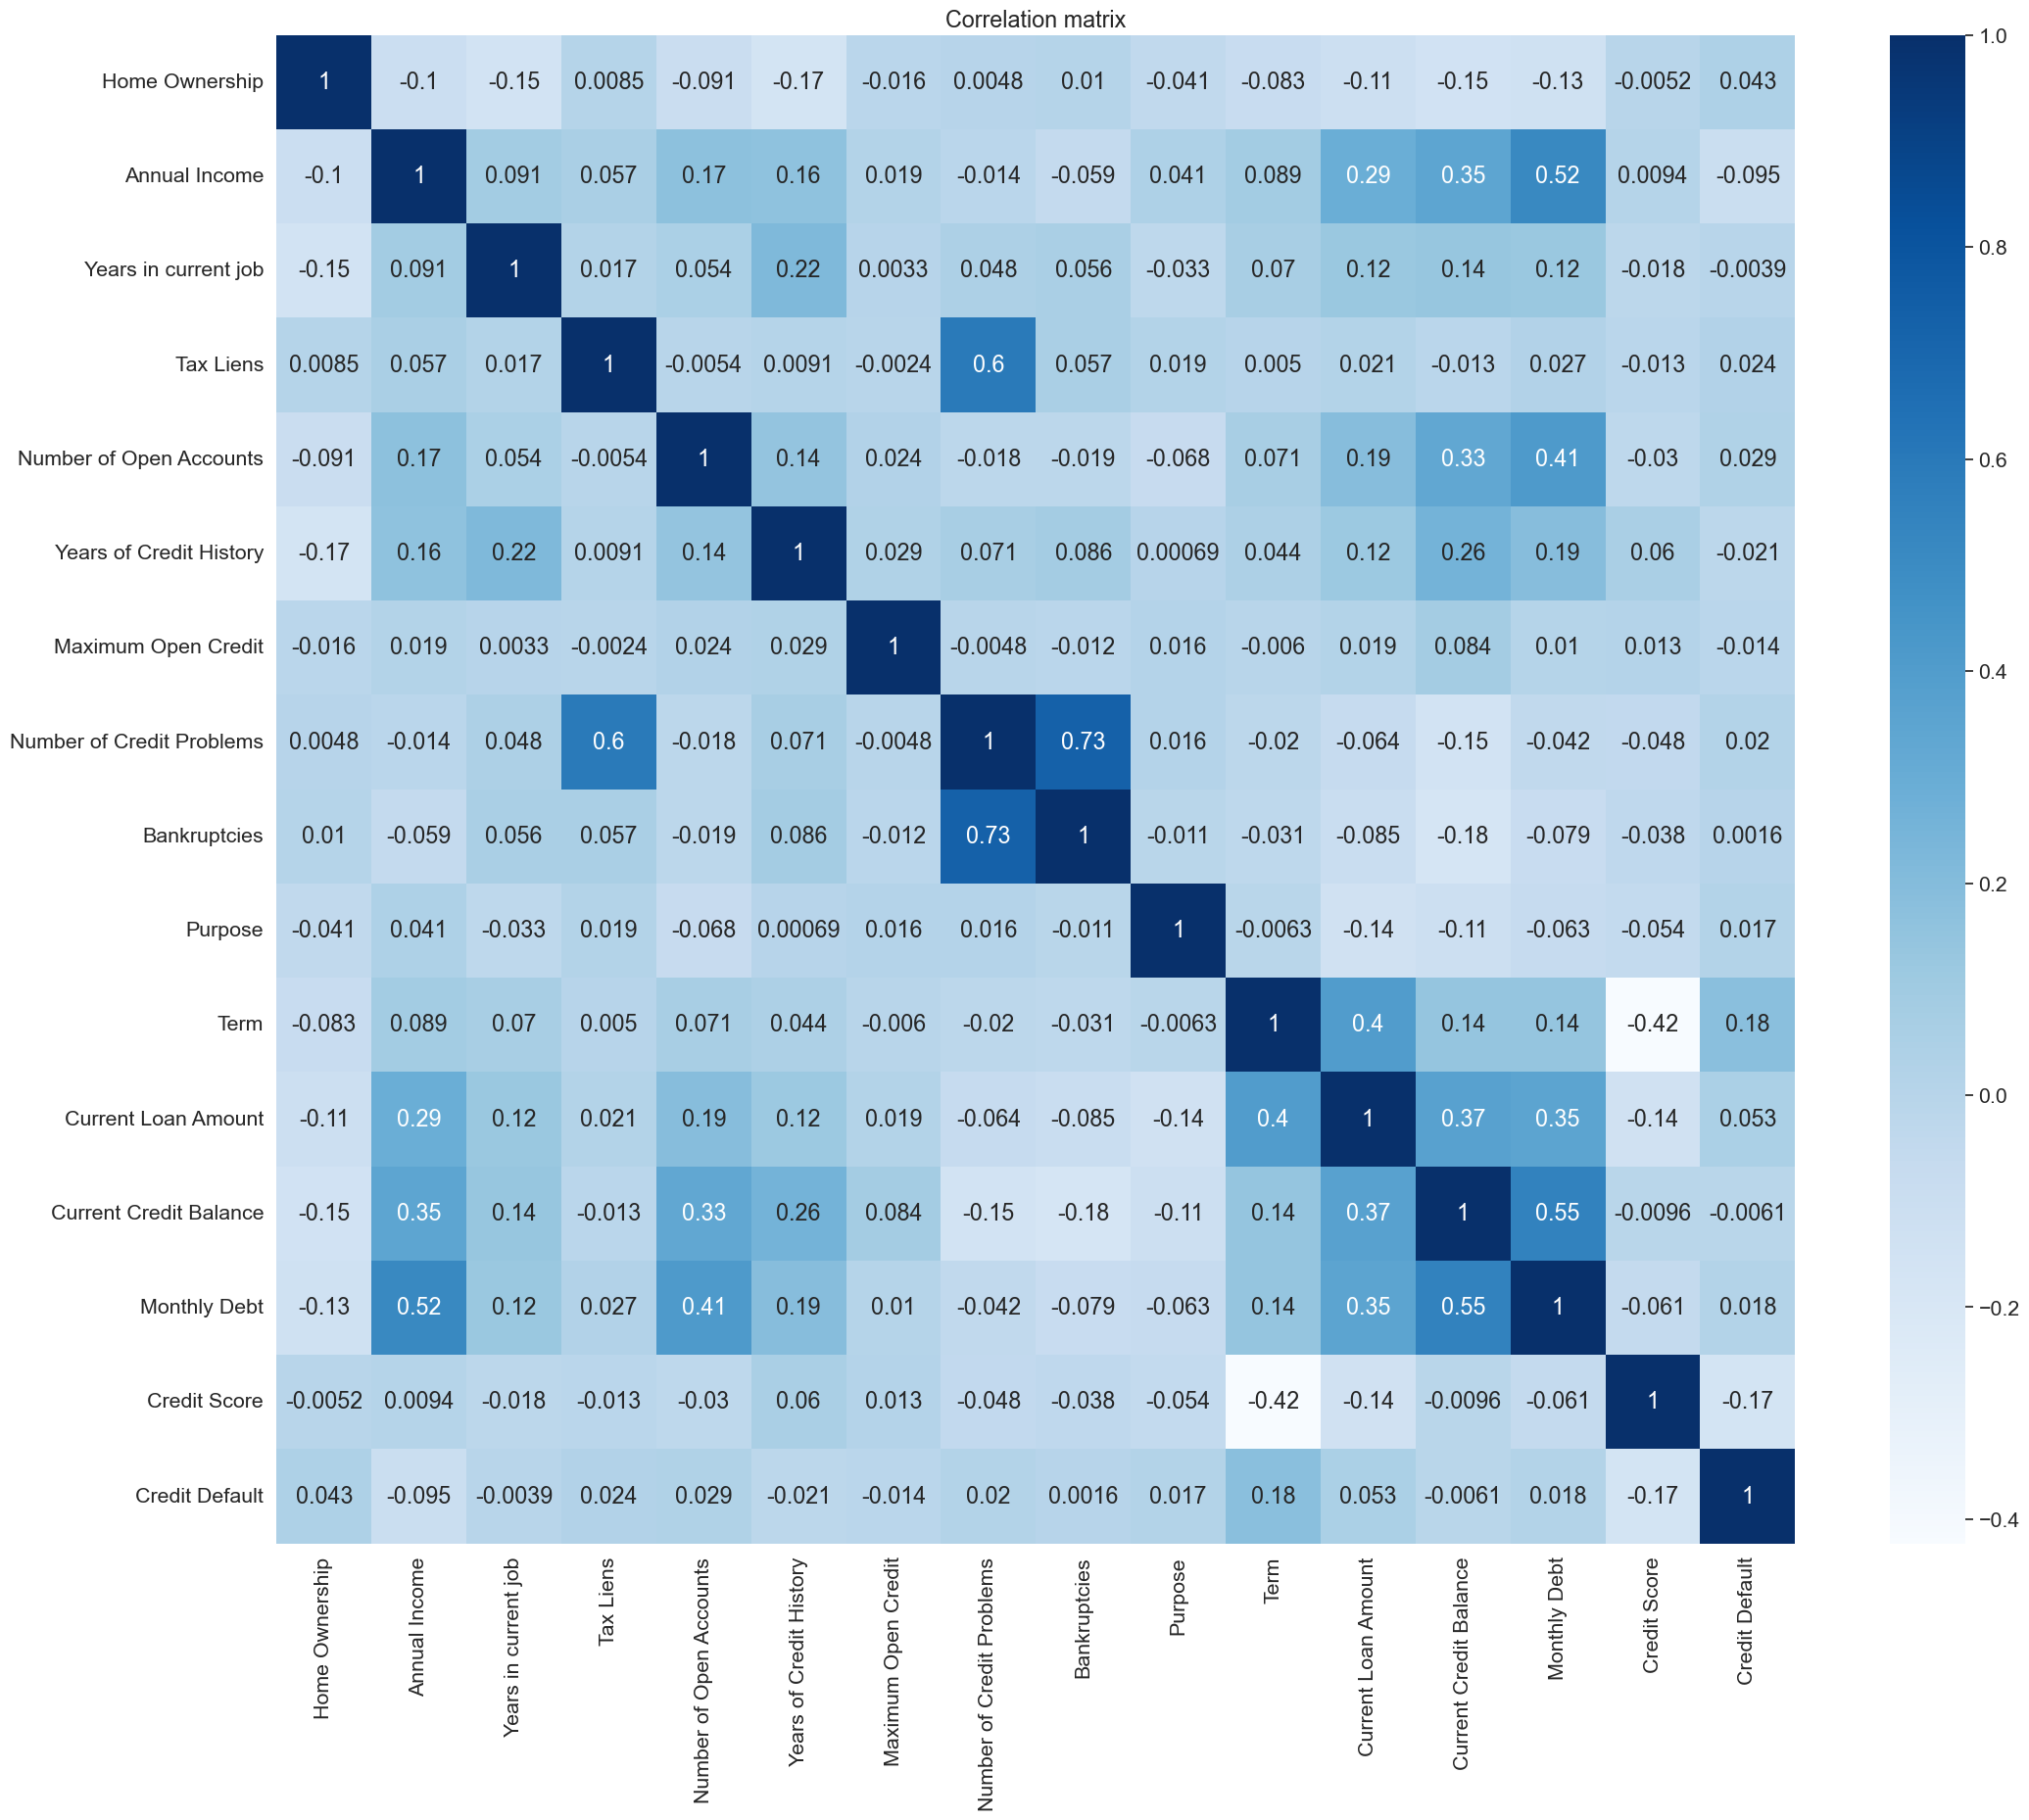

In [1838]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)
corr = df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

plt.title('Correlation matrix')
plt.show()

In [1839]:
accuracy_train = accuracy_score(y_train, pred_train)
accuracy_test = accuracy_score(y_test, pred_test)
print(f'Accuracy на трейне {accuracy_train}')
print(f'Accuracy на тесте {accuracy_test}')

Accuracy на трейне 0.7385
Accuracy на тесте 0.722


In [1840]:
print(confusion_matrix(y_test, pred_test))

[[1025   62]
 [ 355   58]]


In [1841]:
print(pd.crosstab(y_test, pred_test))

col_0              0   1
Credit Default          
0               1025  62
1                355  58


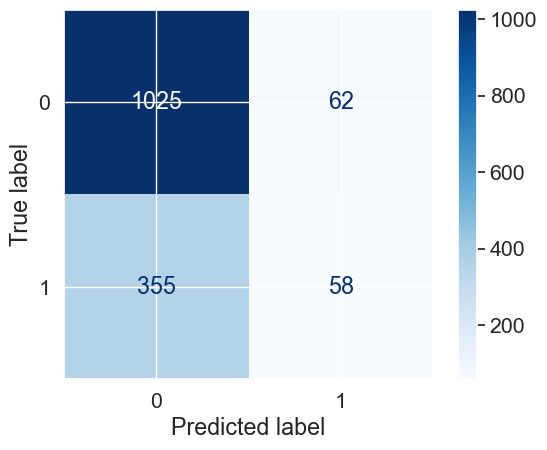

In [1842]:
plot_confusion_matrix(tree, X_test, y_test, cmap=plt.cm.Blues);

In [1843]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83      1087
           1       0.48      0.14      0.22       413

    accuracy                           0.72      1500
   macro avg       0.61      0.54      0.52      1500
weighted avg       0.67      0.72      0.66      1500



In [1844]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [1845]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.72      1.00      0.83      4300
           1       0.41      0.00      0.01      1700

    accuracy                           0.72      6000
   macro avg       0.56      0.50      0.42      6000
weighted avg       0.63      0.72      0.60      6000

TEST

              precision    recall  f1-score   support

           0       0.73      1.00      0.84      1087
           1       0.71      0.01      0.02       413

    accuracy                           0.73      1500
   macro avg       0.72      0.51      0.43      1500
weighted avg       0.72      0.73      0.62      1500

CONFUSION MATRIX

col_0              0  1
Credit Default         
0               1085  2
1                408  5


In [1846]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

y_train_pred = model_knn.predict(X_train)
y_test_pred = model_knn.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      4300
           1       0.68      0.41      0.51      1700

    accuracy                           0.78      6000
   macro avg       0.74      0.67      0.68      6000
weighted avg       0.76      0.78      0.76      6000

TEST

              precision    recall  f1-score   support

           0       0.74      0.85      0.79      1087
           1       0.36      0.22      0.27       413

    accuracy                           0.68      1500
   macro avg       0.55      0.53      0.53      1500
weighted avg       0.63      0.68      0.65      1500

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               926  161
1               324   89


In [1847]:
import numpy as np
import pandas as pd

from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import zconfint

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

In [1848]:
df_base = df

In [1849]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df_base.columns.drop(TARGET_NAME).tolist()
NEW_FEATURE_NAMES = df.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES)

In [1850]:
df[TARGET_NAME].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

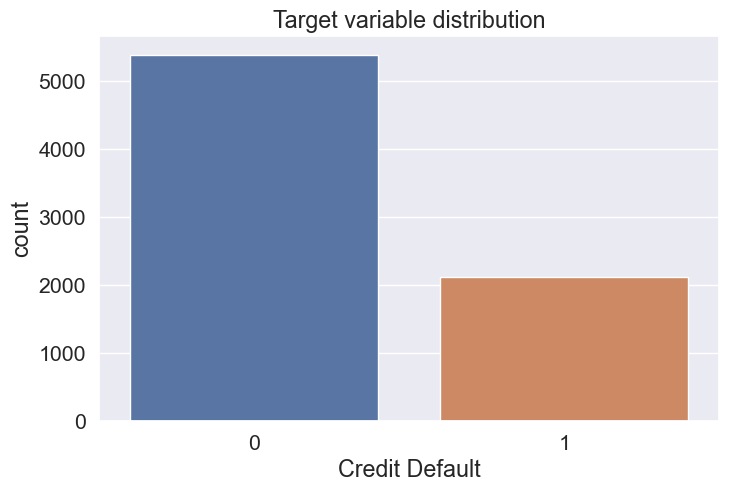

In [1851]:
plt.figure(figsize=(8, 5))

sns.countplot(x=TARGET_NAME, data=df)

plt.title('Target variable distribution')
plt.show()

#### Корреляция с базовыми признаками

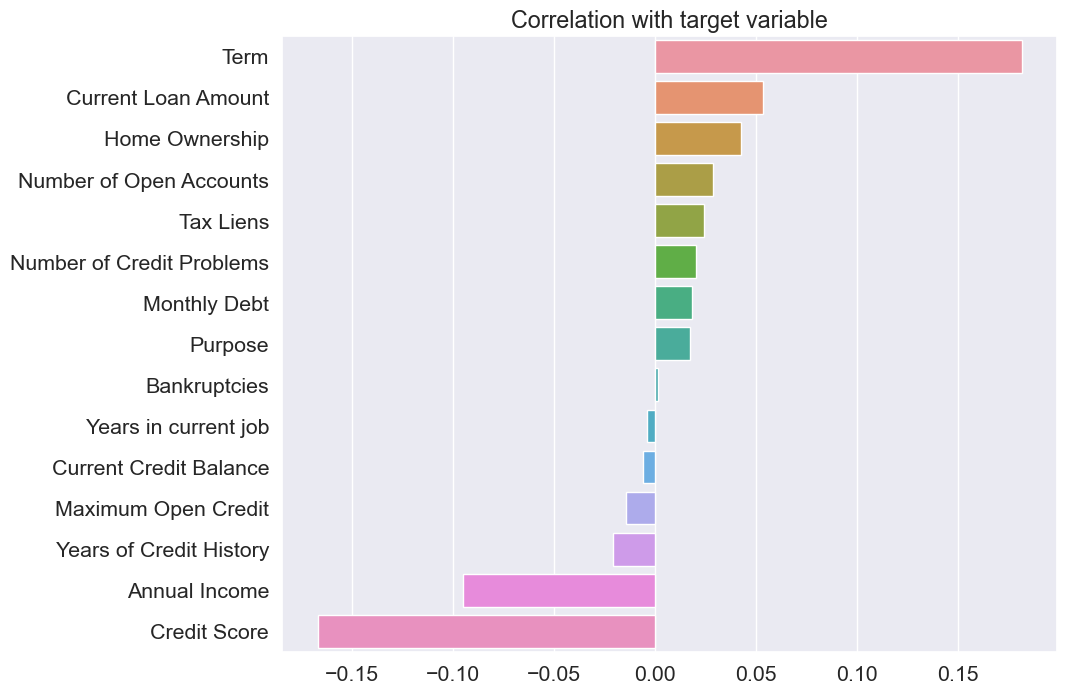

In [1852]:
corr_with_target = df[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

#### Оценка признака 'Term' в разрезе целевой переменной

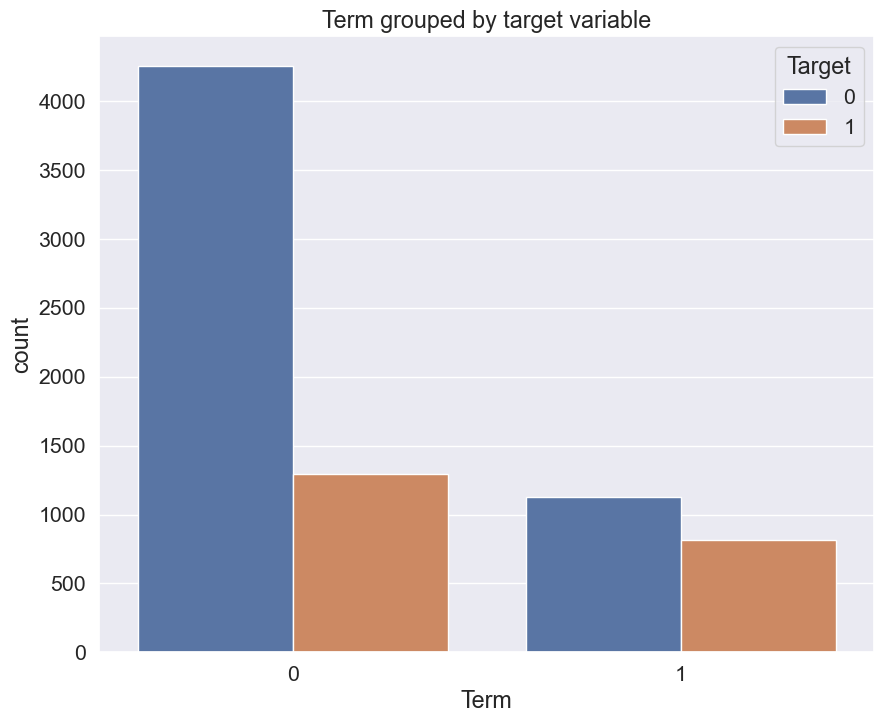

In [1853]:
plt.figure(figsize=(10, 8))

sns.countplot(x='Term', hue=TARGET_NAME, data=df)
plt.title('Term grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

In [1854]:
import pandas as pd
import numpy as np
import pickle
import random

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb, lightgbm as lgbm, catboost as catb

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [1855]:
import warnings
warnings.simplefilter('ignore')

In [1856]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [1857]:
def balance_df_by_target(df, target_name):

    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)

    return df.sample(frac=1) 

In [1858]:
df_base

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,"482,087.00",6.00,0.00,11.00,26.30,"685,960.00",1.00,1.00,0,0,"309,573.00","47,386.00","7,914.00",749.00,0
1,0,"1,025,487.00",10.00,0.00,15.00,15.30,"1,181,730.00",0.00,0.00,0,1,"264,968.00","394,972.00","18,373.00",737.00,1
2,1,"751,412.00",8.00,0.00,11.00,35.00,"1,182,434.00",0.00,0.00,0,0,"309,573.00","308,389.00","13,651.00",742.00,0
3,0,"805,068.00",6.00,0.00,8.00,22.50,"147,400.00",1.00,1.00,0,0,"121,396.00","95,855.00","11,338.00",694.00,0
4,2,"776,264.00",8.00,0.00,13.00,13.60,"385,836.00",1.00,0.00,0,0,"125,840.00","93,309.00","7,180.00",719.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,2,"402,192.00",0.00,0.00,3.00,8.50,"107,866.00",0.00,0.00,1,0,"129,360.00","73,492.00","1,900.00",697.00,0
7496,1,"1,533,984.00",1.00,0.00,10.00,26.50,"686,312.00",0.00,0.00,0,1,"444,048.00","456,399.00","12,783.00",741.00,1
7497,2,"1,878,910.00",6.00,0.00,12.00,32.10,"1,778,920.00",0.00,0.00,4,0,"309,573.00","477,812.00","12,479.00",748.00,0
7498,1,"1,168,386.00",6.00,0.00,21.00,26.50,"1,141,250.00",0.00,0.00,0,0,"615,274.00","476,064.00","37,118.00",731.00,0


In [1859]:
df_base.columns

Index(['Home Ownership', 'Annual Income', 'Years in current job', 'Tax Liens',
       'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems', 'Bankruptcies',
       'Purpose', 'Term', 'Current Loan Amount', 'Current Credit Balance',
       'Monthly Debt', 'Credit Score', 'Credit Default'],
      dtype='object')

In [1860]:
NUM_FEATURE_NAMES = ['Annual Income', 'Years in current job', 'Number of Open Accounts', 'Years of Credit History', 'Maximum Open Credit', 'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt', 'Credit Score']

In [1861]:
CAT_FEATURE_NAMES = ['Home Ownership', 'Tax Liens', 'Number of Credit Problems', 'Bankruptcies', 'Purpose', 'Term']

In [1862]:
for colname in CAT_FEATURE_NAMES:
    df[colname] = pd.Categorical(df[colname])
    
df[CAT_FEATURE_NAMES].dtypes

Home Ownership               category
Tax Liens                    category
Number of Credit Problems    category
Bankruptcies                 category
Purpose                      category
Term                         category
dtype: object

In [1863]:
scaler = StandardScaler()

df_norm = df.copy()
df_norm[NUM_FEATURE_NAMES] = scaler.fit_transform(df_norm[NUM_FEATURE_NAMES])

df = df_norm.copy()

In [1864]:
with open('C:/Users/kutsevichoi/JUPITER/DS Lib/scal_train.csv', 'wb') as file:
    pickle.dump(scaler, file)

In [1865]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.30, random_state=21)

In [1866]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME)
    
df_balanced['Credit Default'].value_counts()

0    3771
1    2958
Name: Credit Default, dtype: int64

In [1867]:
X_train = df_balanced.drop(columns='Credit Default')
y_train = df_balanced['Credit Default']

In [1868]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

### Построение и оценка базовых моделей

#### Логистическая регрессия

In [1869]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.61      0.78      0.68      3771
           1       0.56      0.35      0.43      2958

    accuracy                           0.59      6729
   macro avg       0.58      0.57      0.56      6729
weighted avg       0.58      0.59      0.57      6729

TEST

              precision    recall  f1-score   support

           0       0.75      0.78      0.76      1616
           1       0.36      0.33      0.34       634

    accuracy                           0.65      2250
   macro avg       0.55      0.55      0.55      2250
weighted avg       0.64      0.65      0.64      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1254  362
1                427  207


#### k ближайших соседей

In [1870]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

y_train_pred = model_knn.predict(X_train)
y_test_pred = model_knn.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.76      0.81      0.78      3771
           1       0.73      0.67      0.70      2958

    accuracy                           0.75      6729
   macro avg       0.74      0.74      0.74      6729
weighted avg       0.75      0.75      0.74      6729

TEST

              precision    recall  f1-score   support

           0       0.75      0.70      0.72      1616
           1       0.34      0.40      0.37       634

    accuracy                           0.61      2250
   macro avg       0.54      0.55      0.54      2250
weighted avg       0.63      0.61      0.62      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1125  491
1                380  254


#### Бустинговые алгоритмы

#### XGBoost

In [1871]:
model_xgb = xgb.XGBClassifier(random_state=21)
model_xgb.fit(X_train, y_train)

y_train_pred = model_xgb.predict(X_train)
y_test_pred = model_xgb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3771
           1       0.98      0.97      0.98      2958

    accuracy                           0.98      6729
   macro avg       0.98      0.98      0.98      6729
weighted avg       0.98      0.98      0.98      6729

TEST

              precision    recall  f1-score   support

           0       0.76      0.77      0.77      1616
           1       0.40      0.39      0.40       634

    accuracy                           0.66      2250
   macro avg       0.58      0.58      0.58      2250
weighted avg       0.66      0.66      0.66      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1241  375
1                384  250


#### LightGBM

In [1872]:
model_lgbm = lgbm.LGBMClassifier(random_state=21)
model_lgbm.fit(X_train, y_train)

y_train_pred = model_lgbm.predict(X_train)
y_test_pred = model_lgbm.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3771
           1       0.89      0.87      0.88      2958

    accuracy                           0.90      6729
   macro avg       0.90      0.90      0.90      6729
weighted avg       0.90      0.90      0.90      6729

TEST

              precision    recall  f1-score   support

           0       0.77      0.78      0.78      1616
           1       0.43      0.41      0.42       634

    accuracy                           0.68      2250
   macro avg       0.60      0.60      0.60      2250
weighted avg       0.68      0.68      0.68      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1266  350
1                371  263


##### CatBoost

In [1873]:
model_catb = catb.CatBoostClassifier(silent=True, random_state=21)
model_catb.fit(X_train, y_train)

y_train_pred = model_catb.predict(X_train)
y_test_pred = model_catb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      3771
           1       0.89      0.84      0.86      2958

    accuracy                           0.88      6729
   macro avg       0.88      0.88      0.88      6729
weighted avg       0.88      0.88      0.88      6729

TEST

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1616
           1       0.44      0.44      0.44       634

    accuracy                           0.69      2250
   macro avg       0.61      0.61      0.61      2250
weighted avg       0.69      0.69      0.69      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1262  354
1                352  282


In [1874]:
model_catb = catb.CatBoostClassifier(class_weights=[1, 3], silent=True, random_state=21)

In [1875]:
params = {'n_estimators':[50, 100, 200, 400, 500, 550, 600, 700, 900, 1000, 1100, 1200, 1300, 1500],
          'max_depth':[2, 3, 4, 5, 7, 8, 9]}

In [1876]:
cv=KFold(n_splits=3, random_state=21, shuffle=True)

In [1877]:
%%time

rs = RandomizedSearchCV(model_catb, params, scoring='f1', cv=cv, n_jobs=-1)
rs.fit(X, y)

Wall time: 52.7 s


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=21, shuffle=True),
                   estimator=<catboost.core.CatBoostClassifier object at 0x000001B02BBF5BE0>,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 7, 8, 9],
                                        'n_estimators': [50, 100, 200, 400, 500,
                                                         550, 600, 700, 900,
                                                         1000, 1100, 1200, 1300,
                                                         1500]},
                   scoring='f1')

In [1878]:
rs.best_params_

{'n_estimators': 400, 'max_depth': 3}

In [1879]:
rs.best_score_

0.5065049395166175

In [1913]:
%%time

final_model = catb.CatBoostClassifier(n_estimators=400, max_depth=3,
                                      silent=True, random_state=21)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.72      0.80      0.76      3771
           1       0.70      0.61      0.65      2958

    accuracy                           0.72      6729
   macro avg       0.71      0.70      0.71      6729
weighted avg       0.71      0.72      0.71      6729

TEST

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1616
           1       0.45      0.51      0.48       634

    accuracy                           0.69      2250
   macro avg       0.62      0.63      0.63      2250
weighted avg       0.70      0.69      0.69      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1221  395
1                312  322
Wall time: 1.53 s


In [1914]:
pd.options.display.float_format ='{:,.2f}'.format

In [1915]:
TEST_DATASET_PATH = 'C:/Users/kutsevichoi/JUPITER/DS Lib/course_project_test.csv'

In [1916]:
Test_df = pd.read_csv(TEST_DATASET_PATH)
Test_df.head(10)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.00,9.00,12.50,"220,968.00",0.00,70.00,0.00,debt consolidation,Short Term,"162,470.00","105,906.00","6,813.00",NaN
1,Rent,"231,838.00",1 year,0.00,6.00,32.70,"55,946.00",0.00,8.00,0.00,educational expenses,Short Term,"78,298.00","46,037.00","2,318.00",699.00
2,Home Mortgage,"1,152,540.00",3 years,0.00,10.00,13.70,"204,600.00",0.00,NaN,0.00,debt consolidation,Short Term,"200,178.00","146,490.00","18,729.00","7,260.00"
3,Home Mortgage,"1,220,313.00",10+ years,0.00,16.00,17.00,"456,302.00",0.00,70.00,0.00,debt consolidation,Short Term,"217,382.00","213,199.00","27,559.00",739.00
4,Home Mortgage,"2,340,952.00",6 years,0.00,11.00,23.60,"1,207,272.00",0.00,NaN,0.00,debt consolidation,Long Term,"777,634.00","425,391.00","42,605.00",706.00
5,Home Mortgage,"922,583.00",5 years,0.00,26.00,17.50,"713,174.00",0.00,41.00,0.00,debt consolidation,Short Term,"94,028.00","135,508.00","11,148.00",679.00
6,Home Mortgage,"1,233,309.00",3 years,0.00,7.00,22.00,"376,420.00",0.00,43.00,0.00,home improvements,Short Term,"454,388.00","292,904.00","8,181.00",685.00
7,Rent,"1,215,867.00",3 years,0.00,13.00,12.20,"195,888.00",0.00,19.00,0.00,debt consolidation,Short Term,"407,726.00","120,099.00","7,599.00",701.00
8,Rent,NaN,5 years,0.00,8.00,9.10,"370,524.00",0.00,NaN,0.00,major purchase,Short Term,"131,956.00","237,747.00","10,112.00",NaN
9,Home Mortgage,"2,140,445.00",10+ years,1.00,15.00,16.70,"867,680.00",1.00,9.00,0.00,debt consolidation,Short Term,"391,336.00","294,500.00","18,372.00",745.00


In [1917]:
Test_df.shape

(2500, 16)

In [1918]:
Test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

In [1919]:
Test_df['Home Ownership'].value_counts()

Home Mortgage    1225
Rent             1020
Own Home          248
Have Mortgage       7
Name: Home Ownership, dtype: int64

In [1920]:
Test_df.loc[Test_df['Home Ownership'] == 'Have Mortgage', 'Home Ownership'] = 'Home Mortgage'
Test_df['Home Ownership'].value_counts()

Home Mortgage    1232
Rent             1020
Own Home          248
Name: Home Ownership, dtype: int64

In [1921]:
Test_df['Purpose'].value_counts()

debt consolidation      1973
other                    240
home improvements        140
buy a car                 34
business loan             30
medical bills             27
buy house                 19
take a trip               14
major purchase             9
small business             5
educational expenses       3
vacation                   3
wedding                    2
moving                     1
Name: Purpose, dtype: int64

In [1922]:
Test_df.loc[Test_df['Purpose'] == 'major purchase', 'Purpose'] = 'other'
Test_df.loc[Test_df['Purpose'] == 'buy house', 'Purpose'] = 'home improvements'
Test_df.loc[Test_df['Purpose'] == 'small business', 'Purpose'] = 'business loan'
Test_df.loc[Test_df['Purpose'] == 'wedding', 'Purpose'] = 'other'
Test_df.loc[Test_df['Purpose'] == 'educational expenses', 'Purpose'] = 'other'
Test_df.loc[Test_df['Purpose'] == 'moving', 'Purpose'] = 'other'
Test_df.loc[Test_df['Purpose'] == 'vacation', 'Purpose'] = 'take a trip'
Test_df.loc[Test_df['Purpose'] == 'renewable energy', 'Purpose'] = 'other'
Test_df['Purpose'].value_counts()

debt consolidation    1973
other                  255
home improvements      159
business loan           35
buy a car               34
medical bills           27
take a trip             17
Name: Purpose, dtype: int64

In [1923]:
Test_df.isna().sum()

Home Ownership                     0
Annual Income                    513
Years in current job              86
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    1358
Bankruptcies                       3
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                     513
dtype: int64

In [1924]:
Test_df = Test_df.replace({'Years in current job' : { '10+ years' : '10', '< 1 year' : '0',
                                         '1 year' : '1', '2 years' : '2', '3 years' : '3', '4 years' : '4',
                                           '5 years' : '5', '6 years' : '6', '7 years' : '7', '8 years' : '8',
                                           '9 years' : '9','10 years' : '10',}})

In [1925]:
Test_df['Years in current job'] = Test_df['Years in current job'].astype(float)

In [1926]:
Test_df['Years in current job'].value_counts()

10.00    810
3.00     228
2.00     212
0.00     207
5.00     169
1.00     153
4.00     152
7.00     140
6.00     137
8.00     107
9.00      99
Name: Years in current job, dtype: int64

In [1927]:
Test_df['Annual Income'].fillna(Test_df['Annual Income'].median(), inplace = True)
Test_df['Years in current job'].fillna(Test_df['Years in current job'].median(), inplace = True)
Test_df['Months since last delinquent'].fillna(Test_df['Months since last delinquent'].median(), inplace = True)
Test_df['Bankruptcies'].fillna(Test_df['Bankruptcies'].median(), inplace = True)
Test_df['Credit Score'].fillna(Test_df['Credit Score'].median(), inplace = True)

In [1928]:
for colname in ['Home Ownership', 'Purpose', 'Term']:
    Test_df[colname] = Test_df[colname].astype(str)

In [1929]:
for cat_colname in Test_df.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n\n' + str(Test_df[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Home Ownership

Home Mortgage    1232
Rent             1020
Own Home          248
Name: Home Ownership, dtype: int64
****************************************************************************************************

Purpose

debt consolidation    1973
other                  255
home improvements      159
business loan           35
buy a car               34
medical bills           27
take a trip             17
Name: Purpose, dtype: int64
****************************************************************************************************

Term

Short Term    1861
Long Term      639
Name: Term, dtype: int64
****************************************************************************************************



In [1930]:
Test_df.loc[Test_df['Current Loan Amount'] > 700000.0, 'Current Loan Amount'] = Test_df['Current Loan Amount'].median()

In [1931]:
Test_df.loc[Test_df['Maximum Open Credit'] == 0, 'Maximum Open Credit'] = Test_df['Current Loan Amount']

In [1932]:
Test_df.loc[Test_df['Credit Score'] > 800, 'Credit Score'] = Test_df['Credit Score']/10

In [1933]:
Test_df.loc[Test_df['Number of Credit Problems'] == 0, 'Months since last delinquent'] = 0

In [1934]:
Test_df = Test_df.drop(columns=['Months since last delinquent'])

In [1935]:
Test_df['Home Ownership'] = Test_df['Home Ownership'].map({'Own Home':'0', 'Home Mortgage':'1', 'Rent':'2'}).astype(int)

In [1936]:
Test_df['Purpose'] = Test_df['Purpose'].map({'debt consolidation':'0', 'other':'1', 'home improvements':'2', 'business loan':'3', 'buy a car':'4', 'medical bills':'5', 'take a trip':'6'}).astype(int)

In [1937]:
Test_df['Term'] = Test_df['Term'].map({'Short Term':'0', 'Long Term':'1'}).astype(int)

In [1938]:
for cat_colname in Test_df.select_dtypes(include='object').columns[1:]:
    Test_df = pd.concat([Test_df, pd.get_dummies(df[cat_colname], prefix=cat_colname)], axis=1)

In [1939]:
Test_df.to_csv('C:/Users/kutsevichoi/JUPITER/DS Lib/test_1.csv', index=False, encoding='utf-8')

In [1940]:
y_test_pred = final_model.predict(Test_df)

In [1941]:
y_test_pred

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)